# 1. LinearRegression, Ridge Regression 예제 확인 (5_LinearRegression.pdf)

## -단순 선형회귀 예

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train) #선형회귀(최소제곱법)로 예측함수 추정

w = lr.coef_
b = lr.intercept_
print("w (lr.coef_):", w)
print("b (lr.intercept_):", b)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X_new = [[-1]]
prediction = lr.predict(X_new)
print("예측: {}".format(prediction))

w (lr.coef_): [0.39390555]
b (lr.intercept_): -0.03180434302675973
훈련 세트 점수: 0.67
테스트 세트 점수: 0.66
예측: [-0.42570989]


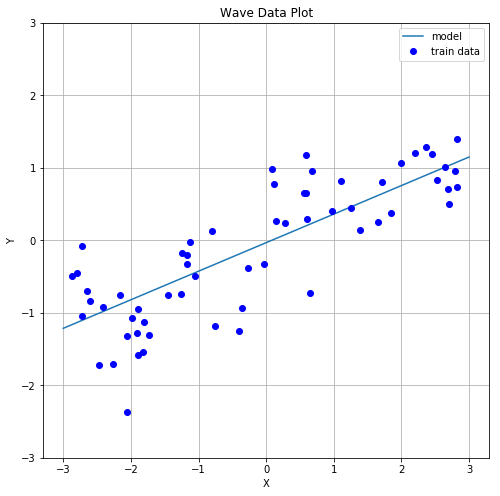

In [5]:
line = np.linspace(-3, 3, 100).reshape(-1, 1)
plt.figure(figsize=(8, 8))
plt.plot(line, lr.predict(line))
plt.plot(X, y, 'o', c='blue')
plt.ylim(-3, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Wave Data Plot")
plt.legend(["model","train data"], loc="best")
plt.grid()
plt.show()

## -다중선형회귀 예

In [6]:
import sklearn.datasets as ds
boston = ds.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape)
print(X_test.shape)

lr = LinearRegression().fit(X_train, y_train)

w = lr.coef_ 
b = lr.intercept_
print("w (lr.coef_):", w)
print("b (lr.intercept_):", b)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

(379, 13)
(127, 13)
w (lr.coef_): [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
b (lr.intercept_): 36.93325545711923
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


## -상관도(correlation)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

INDUS     -0.483725
RM         0.695360
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

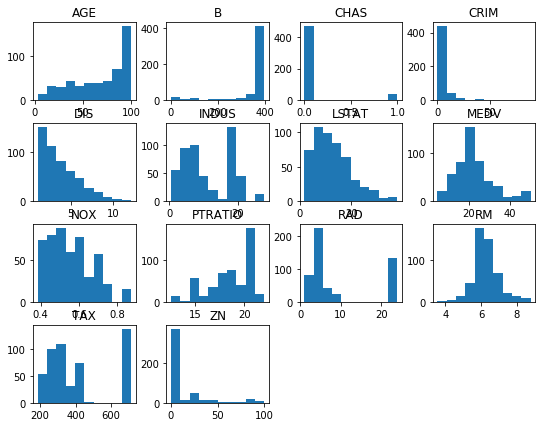

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df.hist(bins=10, figsize=(9,7), grid = False);

corr = df.corr(method='pearson')
display(corr)

corrMEDV = corr['MEDV']
display(corrMEDV)

sub = corrMEDV[corrMEDV.abs() > 0.45]
display(sub)

## -Ridge Regression
## L2규제를 사용하여 과적합되지 않도록 모델을 강제로 제한

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

w = ridge.coef_
b = ridge.intercept_
print("-------------------")
print(" Ridge (alpha=1)")
print("w (ridge.coef_):", w)
print("b (ridge.intercept_):", b)

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)

w = ridge10.coef_
b = ridge10.intercept_
print("-------------------")
print(" Ridge (alpha=10)")
print("w (ridge10.coef_):", w)
print("b (ridge10.intercept_):", b)

print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)

w = ridge01.coef_
b = ridge01.intercept_
print("-------------------")
print(" Ridge (alpha=0.1)")
print("w (ridge01.coef_):", w)
print("b (ridge01.intercept_):", b)

print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))


-------------------
 Ridge (alpha=1)
w (ridge.coef_): [-0.11478591  0.04541838 -0.03540308  2.30329133 -8.12744537  3.80634143
 -0.01428219 -1.33693873  0.21674809 -0.01175498 -0.90393728  0.00881273
 -0.50742473]
b (ridge.intercept_): 31.849731779350833
훈련 세트 점수: 0.77
테스트 세트 점수: 0.63
-------------------
 Ridge (alpha=10)
w (ridge10.coef_): [-0.11235372  0.04795757 -0.06100708  1.6862423  -1.53962161  3.5557743
 -0.0182528  -1.25334748  0.20721315 -0.01262432 -0.84731899  0.00908357
 -0.53553959]
b (ridge10.intercept_): 29.659431257531246
훈련 세트 점수: 0.76
테스트 세트 점수: 0.61
-------------------
 Ridge (alpha=0.1)
w (ridge01.coef_): [-1.17678415e-01  4.40425315e-02 -6.33380725e-03  2.39256711e+00
 -1.54474604e+01  3.77002334e+00 -7.17606565e-03 -1.43308493e+00
  2.39621628e-01 -1.13053164e-02 -9.83972338e-01  8.45145141e-03
 -4.99249019e-01]
b (ridge01.intercept_): 36.83367469262252
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


## -Alpha 값에 따른 계수 확인

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "buttom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


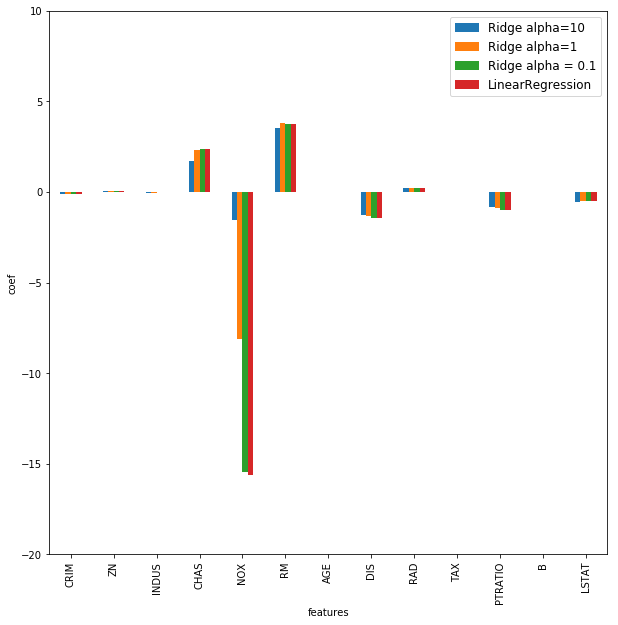

In [9]:
ind = boston.feature_names
dfe = pd.DataFrame({'Ridge alpha=10' : ridge10.coef_,
                    'Ridge alpha=1': ridge.coef_,
                    'Ridge alpha = 0.1' : ridge01.coef_,
                    'LinearRegression': lr.coef_}, index = ind)

dfe.plot.bar(figsize=(10,10))
plt.xlabel("features")
plt.ylabel("coef")
plt.ylim(-20, 10)
plt.legend(fontsize=12, loc='buttom right')

# 2. Wikipedia에서 Anscombe's quartet 3 을 검색하여 해당 데이터의  correlation, mean, std, median 확인 및 plot

## -데이터 불러오기

In [13]:
ans = pd.read_csv("anscombes.csv")
#display(ans)

#id 열 특성 제거
ans.drop(['id'],axis = 1,inplace=True)
display(ans)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## -데이터의 correlation

In [16]:
grouped = ans.groupby('dataset')
corr = grouped.corr(method='pearson')
display(corr)

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

## -mean,std,median 확인하기

In [17]:
r1 = grouped.agg(['mean','std','median'])
r1

x                          y                 
        mean       std median      mean       std median
dataset                                                 
I        9.0  3.316625    9.0  7.500909  2.031568   7.58
II       9.0  3.316625    9.0  7.500909  2.031657   8.14
III      9.0  3.316625    9.0  7.500000  2.030424   7.11
IV       9.0  3.316625    8.0  7.500909  2.030579   7.04

## -Plot

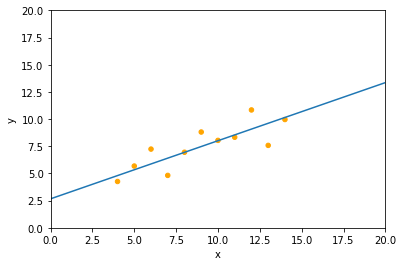

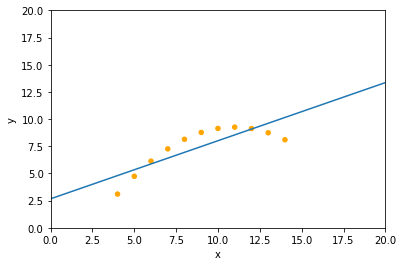

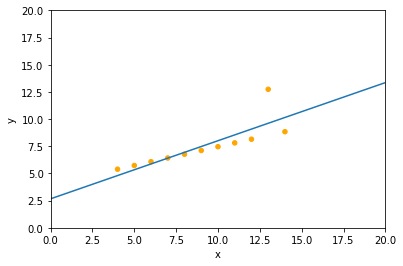

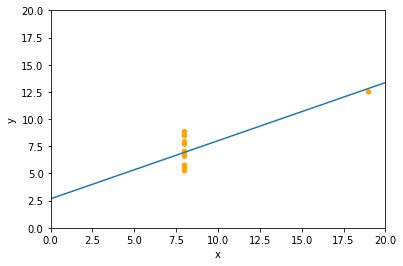

In [27]:
index = ['I','II','III','IV']

X_train,X_test,y_train,y_test = train_test_split(ans['x'].tolist(),ans['y'].tolist(),random_state=0)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lr = LinearRegression().fit(X_train.reshape(X_train.size,1),y_train.reshape(y_train.size,1))

for i in index:
    grouped.get_group(i).plot.scatter(x = 'x',y = 'y',s = [20,20],c='orange',marker = 'o')
    line = np.linspace(-20,20,100).reshape(-1,1)
    plt.xlim(0,20)
    plt.ylim(0,20)
    plt.plot(line,lr.predict(line))